In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [22]:
x,y,z,r,g,b = np.loadtxt('../DATA/bike_florent.txt', delimiter=';', skiprows=1, unpack=True)
colors = np.transpose(np.vstack([r,g,b]))

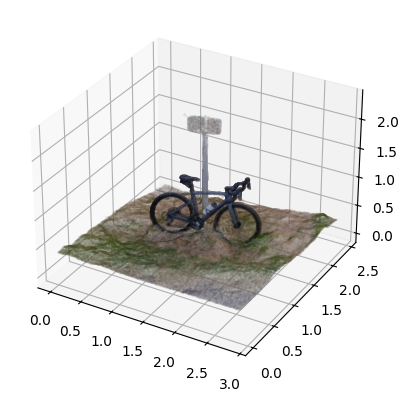

In [31]:
def orthographic_projection(x, y, z):
    """Orthographic projection function."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, s =0.001, c = colors/255)
    plt.show()

orthographic_projection(x, y, z)

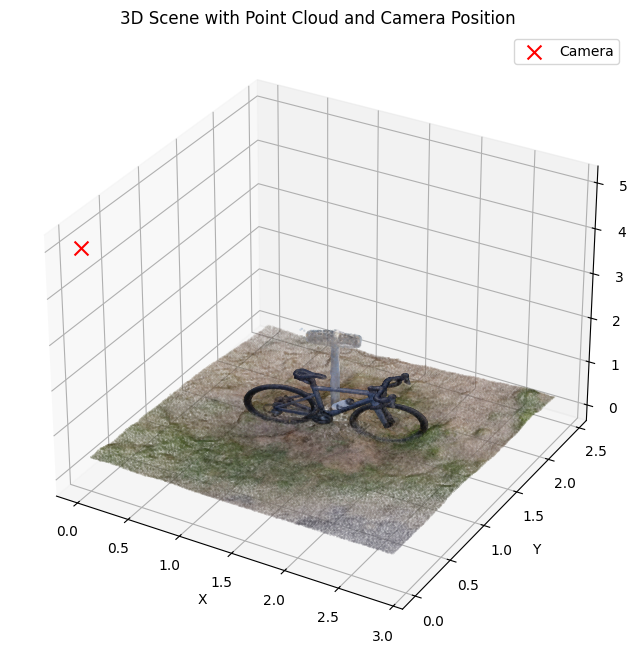

In [66]:
def plot_3d_scene(x, y, z, colors, camera_params):
    """Plot 3d scene function."""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the point cloud
    ax.scatter(x, y, z, c=colors/255, s = 0.005)

    # Plot the camera position
    camera_position = np.array(camera_params['position'])
    ax.scatter(camera_position[0], camera_position[1], camera_position[2], c='r', marker='x', s=100, label='Camera')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Scene with Point Cloud and Camera Position')
    ax.legend()

    plt.show()


# Camera parameters
camera_params = {
    'focal_length': 5,
    'position': [0, 0, 5],
    'orientation': (np.pi/4, np.pi/4, np.pi/4)  # (roll, pitch, yaw) in radians
}

# Plot the 3D scene
plot_3d_scene(x, y, z, colors, camera_params)

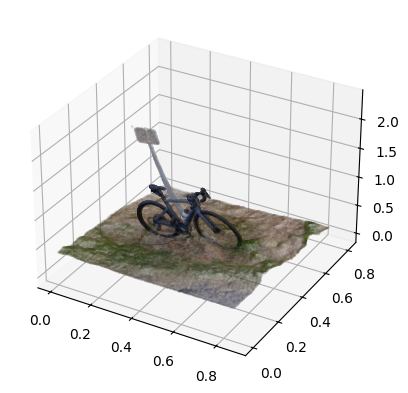

In [33]:
def perspective_projection(x, y, z, f=3):
    """Perspective projection function."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x / (z + f), y / (z + f), z, s =0.001, c = colors/255)
    # ax.scatter(x / (z + f), y / (z + f), depth)
    
    plt.show()

# Example usage:
perspective_projection(x, y, z)

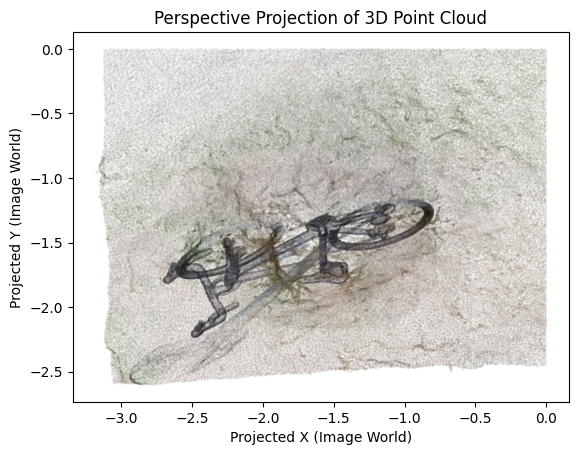

In [68]:
def perspective_projection_3d(x, y, z, colors, camera_params):
    """Perspective projection 3d function."""
    # Extract camera parameters
    focal_length = camera_params['focal_length']
    camera_position = camera_params['position']
    camera_orientation = camera_params['orientation']

    # Transformation matrix to account for camera position and orientation
    rotation_matrix = np.array([
        [np.cos(camera_orientation[1]) * np.cos(camera_orientation[2]), 
         -np.cos(camera_orientation[0]) * np.sin(camera_orientation[2]) + np.sin(camera_orientation[0]) * np.sin(camera_orientation[1]) * np.cos(camera_orientation[2]),
         np.sin(camera_orientation[0]) * np.sin(camera_orientation[2]) + np.cos(camera_orientation[0]) * np.sin(camera_orientation[1]) * np.cos(camera_orientation[2]),
         0],
        
        [np.cos(camera_orientation[1]) * np.sin(camera_orientation[2]), 
         np.cos(camera_orientation[0]) * np.cos(camera_orientation[2]) + np.sin(camera_orientation[0]) * np.sin(camera_orientation[1]) * np.sin(camera_orientation[2]),
         -np.sin(camera_orientation[0]) * np.cos(camera_orientation[2]) + np.cos(camera_orientation[0]) * np.sin(camera_orientation[1]) * np.sin(camera_orientation[2]),
         0],
        
        [-np.sin(camera_orientation[1]), 
         np.sin(camera_orientation[0]) * np.cos(camera_orientation[1]),
         np.cos(camera_orientation[0]) * np.cos(camera_orientation[1]),
         0],
        
        [0, 0, 0, 1]
    ])
    
    translation_matrix = np.array([
        [1, 0, 0, -camera_position[0]],
        [0, 1, 0, -camera_position[1]],
        [0, 0, 1, -camera_position[2]],
        [0, 0, 0, 1]
    ])
    
    transformation_matrix = np.dot(translation_matrix, rotation_matrix)

    # Apply transformation and perspective projection
    points_3d = np.vstack((x, y, z, np.ones_like(x)))
    transformed_points = np.dot(transformation_matrix, points_3d)
    projected_x = focal_length * transformed_points[0] / transformed_points[2]
    projected_y = focal_length * transformed_points[1] / transformed_points[2]

    # Plot the 2D projection
    plt.scatter(projected_x, projected_y, s =0.001, c = colors/255)

    plt.xlabel('Projected X (Image World)')
    plt.ylabel('Projected Y (Image World)')
    plt.title('Perspective Projection of 3D Point Cloud')
    plt.grid(False)
    plt.show()

# Camera parameters
camera_params = {
    'focal_length': 5,
    'position': [0, 0, 5],
    'orientation': (0, 0, 0)  # (roll, pitch, yaw) in radians
}

perspective_projection_3d(x, y, z, colors, camera_params)

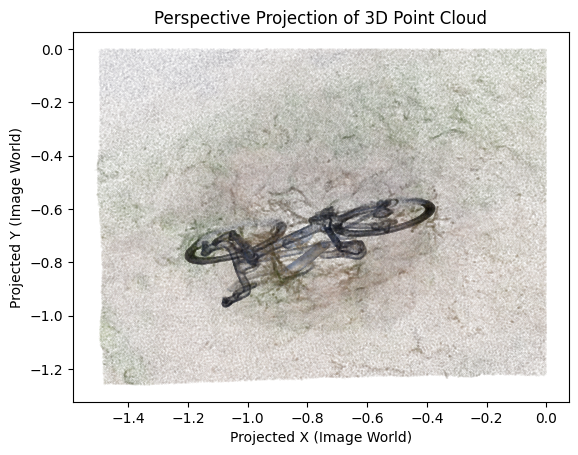

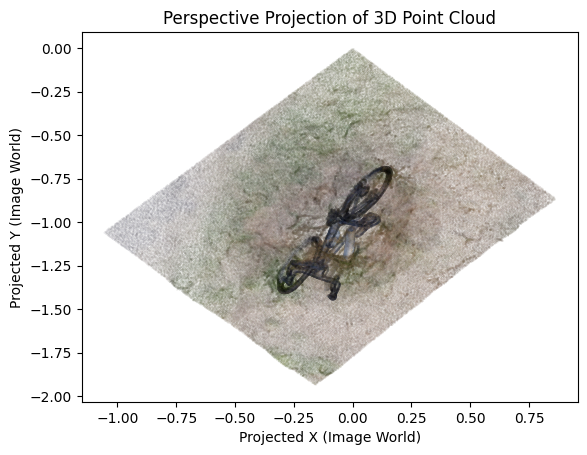

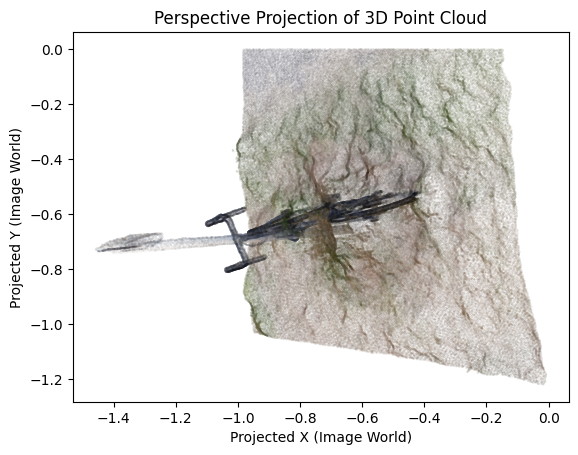

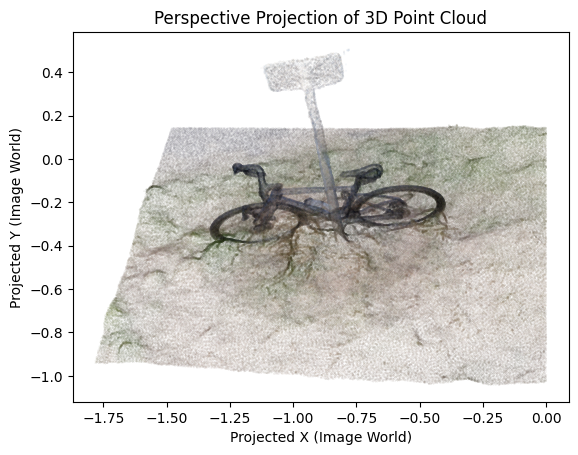

In [69]:
def plot_camera_variations(x, y, z, colors, camera_params_list):
    """Plot camera variations function."""
    # fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    # fig.suptitle('Variations of Camera Parameters', fontsize=16)

    for i, camera_params in enumerate(camera_params_list):
        perspective_projection_3d(x, y, z, colors, camera_params)

# Generate camera parameter variations
camera_params_no_rotation = {
    'focal_length': 5,
    'position': [0, 0, 10],
    'orientation': (0, 0, 0)  # No rotation
}

camera_params_yaw = {
    'focal_length': 5,
    'position': [0, 0, 10],
    'orientation': (0, 0, np.pi/4)  # Yaw rotation
}

camera_params_pitch = {
    'focal_length': 5,
    'position': [0, 0, 10],
    'orientation': (0, np.pi/4, 0)  # Pitch rotation
}

camera_params_roll = {
    'focal_length': 5,
    'position': [0, 0, 10],
    'orientation': (np.pi/4, 0, 0)  # Roll rotation
}

# Create a list of camera parameter variations
camera_params_list = [camera_params_no_rotation, camera_params_yaw, camera_params_pitch, camera_params_roll]

for i, camera_params in enumerate(camera_params_list):
    perspective_projection_3d(x, y, z, colors, camera_params)

# Example usage
# plot_camera_variations(x, y, z, colors, camera_params_list)

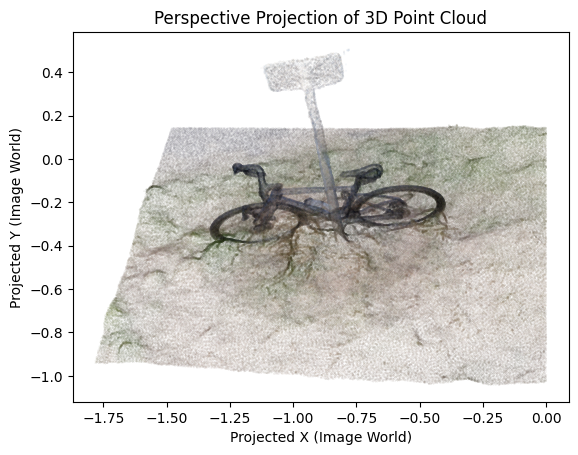

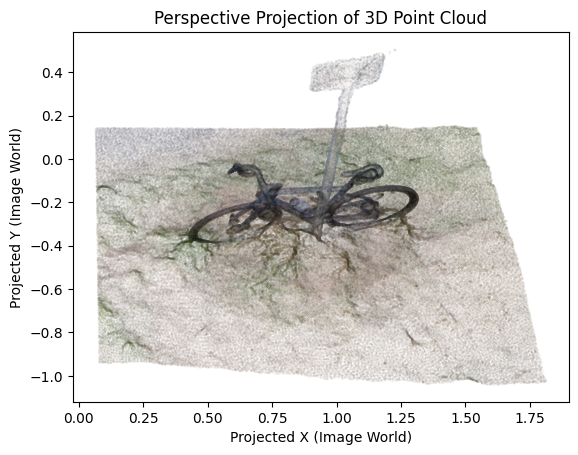

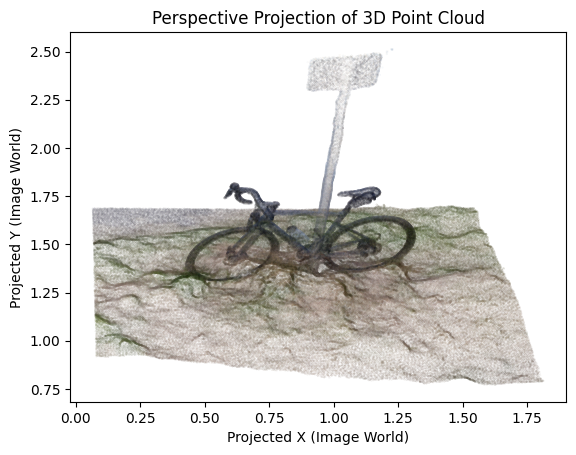

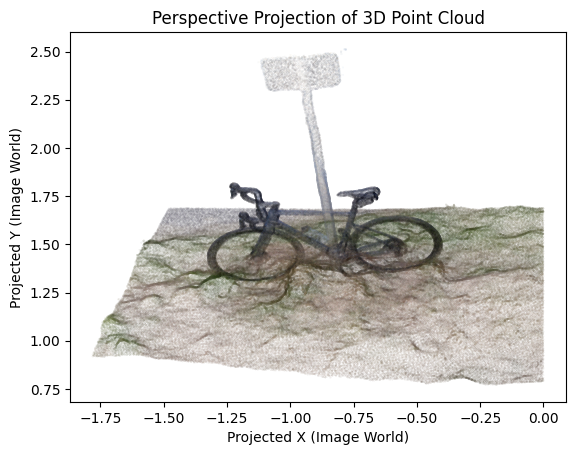

In [75]:
camera_1 = {
    'focal_length': 5,
    'position': [0, 0, 10],
    'orientation': (np.pi/4, 0, 0)  # No rotation
}

camera_2 = {
    'focal_length': 5,
    'position': [3, 0, 10],
    'orientation': (2 * np.pi/4 - np.pi/4, 0, 0)  # Yaw rotation
}

camera_3 = {
    'focal_length': 5,
    'position': [3, 3, 10],
    'orientation': (2 * np.pi/4 - np.pi/4, 0, 0)  # Pitch rotation
}

camera_4 = {
    'focal_length': 5,
    'position': [0, 3, 10],
    'orientation': (np.pi/4, 0, 0)  # Roll rotation
}

# Create a list of camera parameter variations
camera_params_list = [camera_1, camera_2, camera_3, camera_4]

for i, camera_params in enumerate(camera_params_list):
    perspective_projection_3d(x, y, z, colors, camera_params)


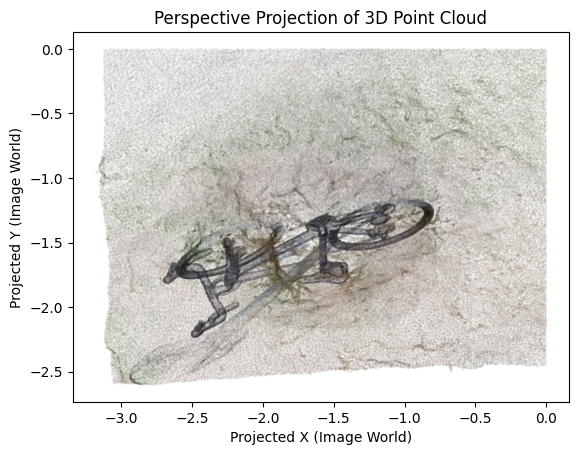

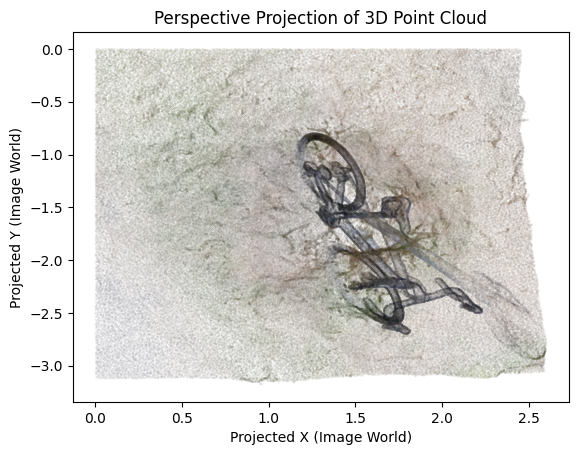

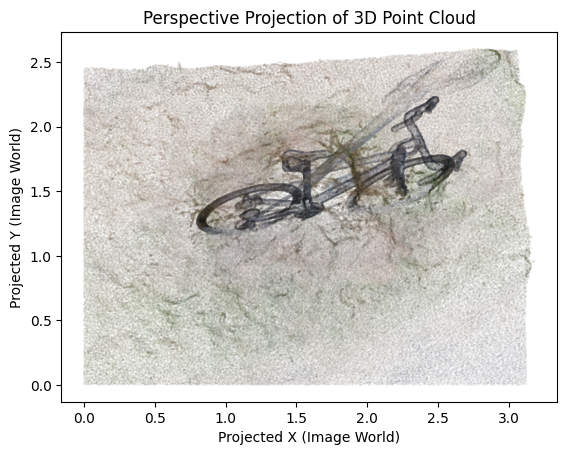

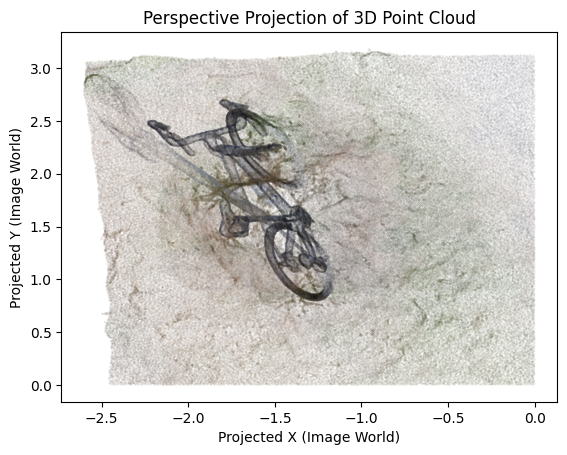

In [77]:
def generate_images_around_point_cloud(x, y, z, colors, num_images=4):
    """Generate images around point cloud function."""
    for i in range(num_images):
        azimuth_angle = i * (360 / num_images)
        camera_params = {
            'focal_length': 5,
            'position': [0, 0, 5],
            'orientation': (0, 0, np.radians(azimuth_angle))
        }

        perspective_projection_3d(x, y, z, colors, camera_params)
# Generate images by circling around the point cloud
generate_images_around_point_cloud(x, y, z, colors, num_images=4)

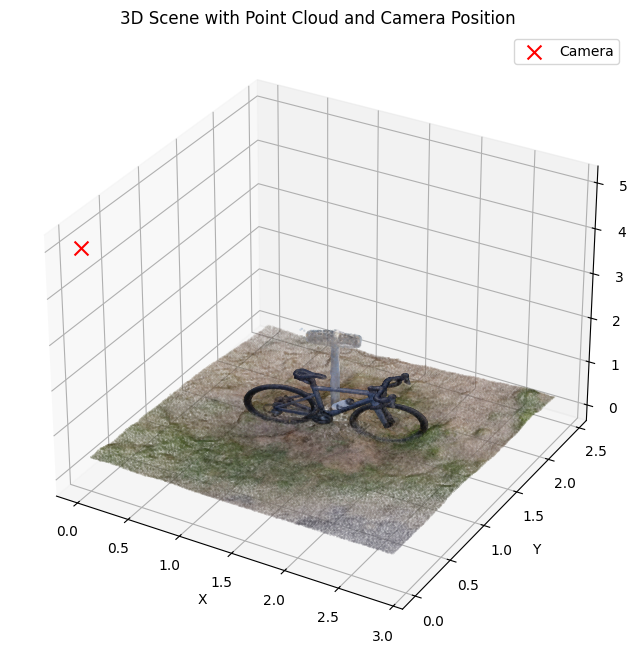

In [65]:
def plot_3d_scene(x, y, z, colors, camera_params):
    """Plot 3d scene function."""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the point cloud
    ax.scatter(x, y, z, c=colors/255, s = 0.005)

    # Plot the camera position
    camera_position = np.array(camera_params['position'])
    ax.scatter(camera_position[0], camera_position[1], camera_position[2], c='r', marker='x', s=100, label='Camera')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Scene with Point Cloud and Camera Position')
    ax.legend()

    plt.show()


# Camera parameters
camera_params = {
    'focal_length': 5,
    'position': [0, 0, 5],
    'orientation': (np.pi/4, np.pi/4, np.pi/4)  # (roll, pitch, yaw) in radians
}

# Plot the 3D scene
plot_3d_scene(x, y, z, colors, camera_params)

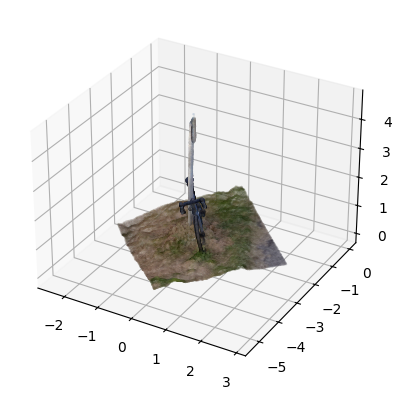

In [36]:
def isometric_projection(x, y, z):
    """Isometric projection function."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x - y, -x - y, z * 2, s =0.001, c = colors/255)

    plt.show()

# Example usage:
isometric_projection(x, y, z)